In [1]:
%load_ext autoreload
%autoreload 2

>> Import required Libraries

In [27]:
import os
import sys
import numpy
import matplotlib.pyplot as plt
import laspy as lp
import geopandas as gpd

>> Import required modules

In [24]:
sys.path.append(os.path.abspath(os.path.join('../usgs_lidar')))
from json_gen import DataGen
from lidar import Lidar
from load_data import LoadData
from transform import Transform
from display import Display

>> Initialize classes

In [25]:
datagen = DataGen()
lidar = Lidar("IA_FullState", '../usgs_lidar/pipeline.json')
load_data = LoadData()
transform = Transform()
display = Display('./ia_fullstate.las')

>> #### Generate JSON Data

In [7]:
datagen.generate_json(source="../usgs_lidar/rg_year.txt", dest="../data/regions.json")

>> #### Generate Metadata

In [8]:
load_data.get_data("../data/regions.json")

The status:  {'bounds': [-11118991, 3531015, -105689, -10906947, 3743059, 106355], 'boundsConforming': [-11109698, 3531016, -709, -10916240, 3743057, 1374], 'dataType': 'laszip', 'hierarchyType': 'json', 'points': 3118811953, 'schema': [{'name': 'X', 'offset': -11012969, 'scale': 0.01, 'size': 4, 'type': 'signed'}, {'name': 'Y', 'offset': 3637036, 'scale': 0.01, 'size': 4, 'type': 'signed'}, {'name': 'Z', 'offset': 332, 'scale': 0.001, 'size': 4, 'type': 'signed'}, {'name': 'Intensity', 'size': 2, 'type': 'unsigned'}, {'name': 'ReturnNumber', 'size': 1, 'type': 'unsigned'}, {'name': 'NumberOfReturns', 'size': 1, 'type': 'unsigned'}, {'name': 'ScanDirectionFlag', 'size': 1, 'type': 'unsigned'}, {'name': 'EdgeOfFlightLine', 'size': 1, 'type': 'unsigned'}, {'name': 'Classification', 'size': 1, 'type': 'unsigned'}, {'name': 'ScanAngleRank', 'size': 4, 'type': 'float'}, {'name': 'UserData', 'size': 1, 'type': 'unsigned'}, {'name': 'PointSourceId', 'size': 2, 'type': 'unsigned'}, {'name': 'G

Get elevations for each coordinates

In [12]:
# Boundary Coordinate
bd = "([-10425171.940, -10423171.940], [5164494.710, 5166494.710])"
lidar.get_elevation(bd)

{'pipeline': [{'bounds': '([-10425171.940, -10423171.940], [5164494.710, 5166494.710])', 'filename': 'https://s3-us-west-2.amazonaws.com/usgs-lidar-public/IA_FullState/ept.json', 'type': 'readers.ept', 'tag': 'readdata'}, {'limits': 'Classification![2:7], Classification![9:9]', 'type': 'filters.range', 'tag': 'nonoise'}, {'in_srs': 'EPSG: 3857', 'out_srs': 'EPSG: 4326', 'tag': 'reprojectUTM', 'type': 'filters.reprojection'}, {'filename': 'ia_fullstate.las', 'inputs': ['reprojectUTM'], 'tag': 'writerslas', 'type': 'writers.las'}, {'filename': 'ia_fullstate.tif', 'gdalopts': 'tiled=yes,     compress=deflate', 'inputs': ['writerslas'], 'nodata': -9999, 'output_type': 'idw', 'resolution': 1, 'type': 'writers.gdal', 'window_size': 6}]}


/home/jedi/anaconda3/envs/lidar/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


Data Display

In [28]:
df_gpd = gpd.read_file('../data/geo.geojson')

In [29]:
df_gpd

,elevation_m,geometry
0,272.02,POINT (-93.63765 42.03675)
1,272.77,POINT (-93.63774 42.03674)
2,272.81,POINT (-93.63770 42.03675)
3,279.86,POINT (-93.63750 42.03678)
4,272.67,POINT (-93.63771 42.03676)
...,...,...
1788788,294.66,POINT (-93.64382 42.02731)
1788789,286.31,POINT (-93.64379 42.02731)
1788790,291.98,POINT (-93.64380 42.02731)
1788791,286.24,POINT (-93.64377 42.02731)


Visualization

1788793
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


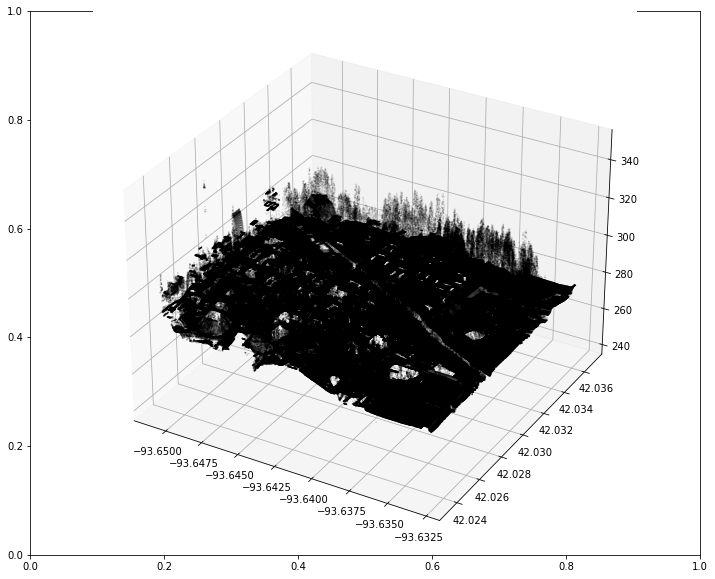

In [26]:
display.plot_3d('../data/geo.geojson')